# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
#print(iris.feature_names)
#print(iris.data[0:5,:])
#print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Split data into training and testing parts:

In [2]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [3]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now.

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



Model Accuracy: 1.00


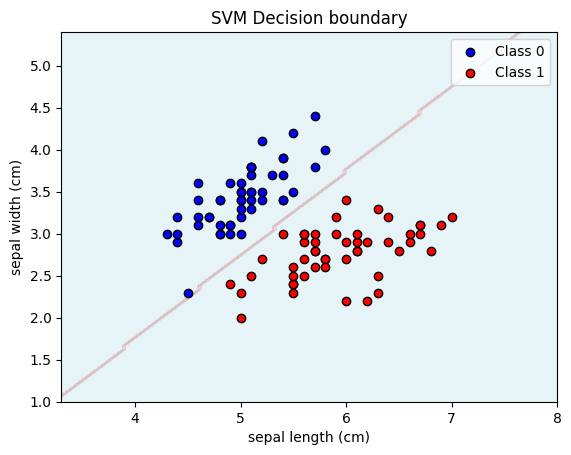

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Filter out class 2
mask = y != 2
X, y = X[mask], y[mask]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluate the model
accuracy = svm_model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, colors=["lightblue", "lightcoral"])
    colors = ['blue', 'red']
    for i, label in enumerate(np.unique(y)):
        plt.scatter(X[y == label, 0], X[y == label, 1], color=colors[i], edgecolors='black', label=f"Class {label}")
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("SVM Decision boundary")
    plt.legend()
    plt.show()

plot_decision_boundary(svm_model, X, y)


Plot scatterplots of targets 0 and 1 and check the separability of the classes:

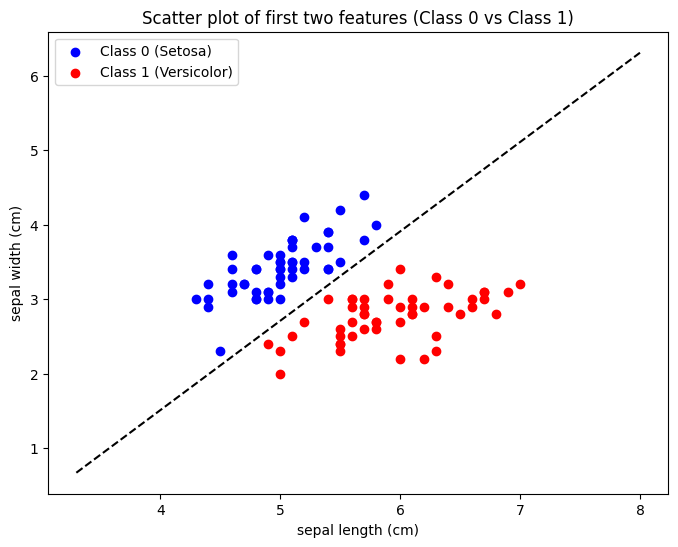

In [ ]:
# Scatter plot for class 0 and class 1
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0 (Setosa)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1 (Versicolor)')

# Plot decision line
plt.plot(x_vals, y_vals, 'k--')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Scatter plot of first two features (Class 0 vs Class 1)")
plt.legend()
plt.show()




Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

In [ ]:
# Train and evaluate SVM with different C values

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

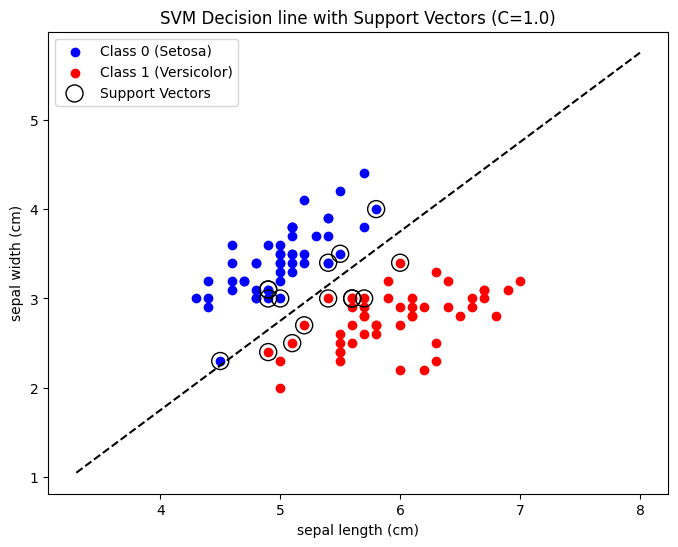

In [ ]:
# Extract support vectors
support_vectors = svm_model.support_vectors_

# Extract coefficients for the decision boundary
W = svm_model.coef_[0]
b = svm_model.intercept_[0]

# Generate x values for the decision line
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_vals = np.linspace(x_min, x_max, 100)

# Compute corresponding y values using the decision line equation
y_vals = -(W[0] * x_vals + b) / W[1]

# Plot data points
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Class 0 (Setosa)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', label='Class 1 (Versicolor)')

# Plot support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, edgecolors='black',
            facecolors='none', label="Support Vectors")

# Plot decision line
plt.plot(x_vals, y_vals, 'k--')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"SVM Decision line with Support Vectors (C={svm_model.C})")
plt.legend()
plt.show()



# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

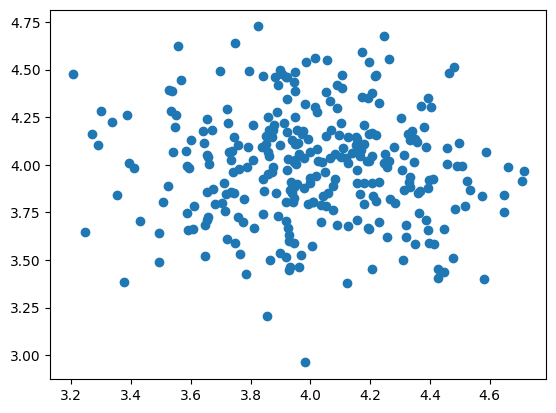

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()



Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

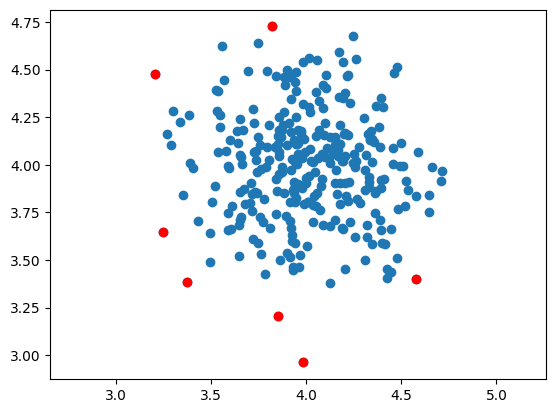

In [ ]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

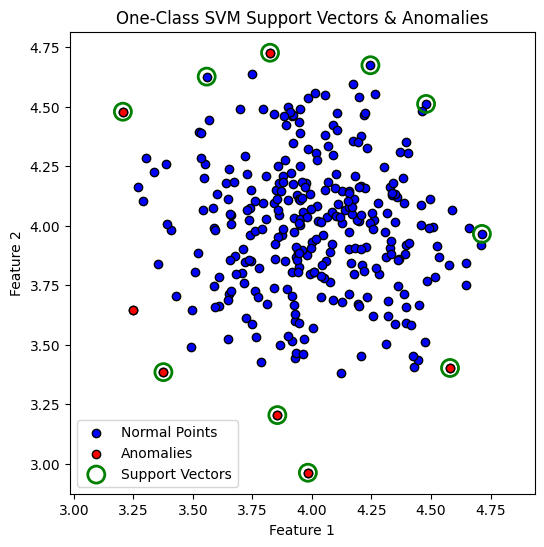

In [ ]:
# Extract support vectors from the trained One-Class SVM model
support_vectors = SVMmodelOne.support_vectors_

# Plot the data points
plt.figure(figsize=(6, 6))
plt.scatter(x[:, 0], x[:, 1], color='blue', edgecolors='k', label="Normal Points")

# Plot the detected anomalies
plt.scatter(values[:, 0], values[:, 1], color='red', edgecolors='k', label="Anomalies")

# Plot the support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150,
            facecolors='none', edgecolors='green', linewidths=2, label="Support Vectors")

plt.axis('equal')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("One-Class SVM Support Vectors & Anomalies")
plt.legend()
plt.show()


What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.987833799021839


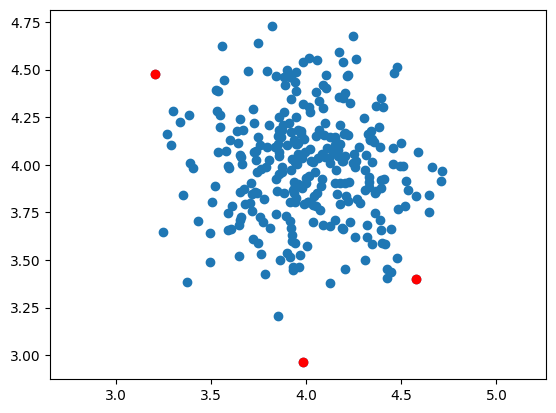

In [ ]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.01)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()